## PI_ ANN_07fev20 - full data_keras_simples

In [1]:
import numpy as np
import pandas as pd
import csv
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [2]:
data = pd.read_csv(r'data32.csv', header=0)

In [3]:
data.head(3)

,CO_PROFESSOR,TT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010.1,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,2017176053,1,1,4,3,4,4,2,2,4,3,2,3,1,0,1
1,2017282685,1,1,4,3,4,4,2,2,4,3,2,3,1,0,1
2,2017289663,1,1,4,3,4,4,2,2,4,3,2,3,1,0,1


In [4]:
data=data.drop(['TX_RESP_Q010.1'], axis=1)

In [5]:
data.tail(3)

,CO_PROFESSOR,TT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
6841,2017340078,0,0,2,2,3,4,1,0,3,6,6,1,0,1
6842,2017085233,0,0,2,2,3,4,1,0,3,6,6,1,0,1
6843,2017042361,0,1,4,3,2,4,2,1,2,6,5,1,0,2


In [6]:
data.shape

(6844, 15)

In [7]:
y = data.loc[:,'TT']

In [8]:
y.shape

(6844,)

In [9]:
data=data.drop(['CO_PROFESSOR'], axis=1)

In [10]:
data.head(1)

,TT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,1,1,4,3,4,4,2,2,3,2,3,1,0,1


In [11]:
data=data.drop(['TT'], axis=1)

In [12]:
data.head(1)

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,1,4,3,4,4,2,2,3,2,3,1,0,1


In [13]:
data.shape

(6844, 13)

In [14]:
X=data.to_numpy()
# https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array
X

array([[1, 4, 3, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 1],
       ...,
       [0, 2, 2, ..., 1, 0, 1],
       [0, 2, 2, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 2]], dtype=int64)

In [15]:
y=y.to_numpy()

In [16]:
#Normalização dos dados de entrada -- variável explicativa
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
# Separação entre conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [18]:
#Definição da ANN e suas camadas
import keras
from keras.models import Sequential
from keras.layers import Dense
# Rede Neural -- 13 entradas e 01 saída, com 2 camadas intermediárias (hidden)
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

Using TensorFlow backend.


In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
treino = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
6159/6159 [==============================] - 1s 159us/step - loss: 0.5709 - accuracy: 0.7688
Epoch 2/100
6159/6159 [==============================] - 0s 16us/step - loss: 0.5169 - accuracy: 0.8061
Epoch 3/100
6159/6159 [==============================] - 0s 14us/step - loss: 0.5012 - accuracy: 0.8063
Epoch 4/100
6159/6159 [==============================] - 0s 14us/step - loss: 0.4939 - accuracy: 0.8063
Epoch 5/100
6159/6159 [==============================] - 0s 14us/step - loss: 0.4893 - accuracy: 0.8063
Epoch 6/100
6159/6159 [==============================] - 0s 14us/step - loss: 0.4856 - accuracy: 0.8063
Epoch 7/100
6159/6159 [==============================] - 0s 14us/step - loss: 0.4827 - accuracy: 0.8063
Epoch 8/100
6159/6159 [==============================] - 0s 14us/step - loss: 0.4803 - accuracy: 0.8063
Epoch 9/100
6159/6159 [==============================] - 0s 14us/step - loss: 0.4777 - accuracy: 0.8063
Epoch 10/100
6159/6159 [==============================] - 0s 14

In [21]:
y_pred = model.predict(X_test)
# Conversão das predições
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
# Conversão da parte one hot encoded test label para resultado
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [22]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 96.4963503649635


In [23]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

Train on 6159 samples, validate on 685 samples
Epoch 1/500
6159/6159 [==============================] - 0s 18us/step - loss: 0.4096 - accuracy: 0.8186 - val_loss: 0.4619 - val_accuracy: 0.8000
Epoch 2/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.4095 - accuracy: 0.8203 - val_loss: 0.4610 - val_accuracy: 0.8000
Epoch 3/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.4091 - accuracy: 0.8211 - val_loss: 0.4614 - val_accuracy: 0.7985
Epoch 4/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.4093 - accuracy: 0.8195 - val_loss: 0.4625 - val_accuracy: 0.7985
Epoch 5/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.4090 - accuracy: 0.8208 - val_loss: 0.4616 - val_accuracy: 0.7985
Epoch 6/500
6159/6159 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.81 - 0s 15us/step - loss: 0.4089 - accuracy: 0.8217 - val_loss: 0.4616 - val_accuracy: 0.7985
Epoch 7/500
6159/6159 [============

6159/6159 [==============================] - 0s 16us/step - loss: 0.3997 - accuracy: 0.8224 - val_loss: 0.4696 - val_accuracy: 0.7985
Epoch 111/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.3991 - accuracy: 0.8248 - val_loss: 0.4706 - val_accuracy: 0.7985
Epoch 112/500
6159/6159 [==============================] - 0s 19us/step - loss: 0.3991 - accuracy: 0.8229 - val_loss: 0.4698 - val_accuracy: 0.8015
Epoch 113/500
6159/6159 [==============================] - 0s 17us/step - loss: 0.3994 - accuracy: 0.8245 - val_loss: 0.4687 - val_accuracy: 0.8015
Epoch 114/500
6159/6159 [==============================] - 0s 17us/step - loss: 0.3989 - accuracy: 0.8230 - val_loss: 0.4706 - val_accuracy: 0.8029
Epoch 115/500
6159/6159 [==============================] - 0s 18us/step - loss: 0.3990 - accuracy: 0.8245 - val_loss: 0.4715 - val_accuracy: 0.8015
Epoch 116/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.3985 - accuracy: 0.8250 - val_loss: 0.4694 -

Epoch 220/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3913 - accuracy: 0.8277 - val_loss: 0.4681 - val_accuracy: 0.8058
Epoch 221/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3911 - accuracy: 0.8277 - val_loss: 0.4652 - val_accuracy: 0.8073
Epoch 222/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3908 - accuracy: 0.8277 - val_loss: 0.4658 - val_accuracy: 0.8044
Epoch 223/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3906 - accuracy: 0.8272 - val_loss: 0.4634 - val_accuracy: 0.8000
Epoch 224/500
6159/6159 [==============================] - 0s 14us/step - loss: 0.3912 - accuracy: 0.8292 - val_loss: 0.4662 - val_accuracy: 0.8073
Epoch 225/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3907 - accuracy: 0.8281 - val_loss: 0.4639 - val_accuracy: 0.7971
Epoch 226/500
6159/6159 [==============================] - 0s 14us/step - loss: 0.3912 - accuracy: 0.8277 - val_

Epoch 275/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.3890 - accuracy: 0.8282 - val_loss: 0.4622 - val_accuracy: 0.8058
Epoch 276/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.3889 - accuracy: 0.8290 - val_loss: 0.4634 - val_accuracy: 0.8000
Epoch 277/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.3886 - accuracy: 0.8292 - val_loss: 0.4642 - val_accuracy: 0.8073
Epoch 278/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3894 - accuracy: 0.8289 - val_loss: 0.4640 - val_accuracy: 0.8058
Epoch 279/500
6159/6159 [==============================] - 0s 19us/step - loss: 0.3890 - accuracy: 0.8287 - val_loss: 0.4646 - val_accuracy: 0.8058
Epoch 280/500
6159/6159 [==============================] - 0s 20us/step - loss: 0.3887 - accuracy: 0.8303 - val_loss: 0.4645 - val_accuracy: 0.8058
Epoch 281/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3887 - accuracy: 0.8289 - val_

6159/6159 [==============================] - 0s 14us/step - loss: 0.3869 - accuracy: 0.8320 - val_loss: 0.4638 - val_accuracy: 0.8073
Epoch 384/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3866 - accuracy: 0.8305 - val_loss: 0.4614 - val_accuracy: 0.8088
Epoch 385/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3865 - accuracy: 0.8313 - val_loss: 0.4639 - val_accuracy: 0.8088
Epoch 386/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3866 - accuracy: 0.8320 - val_loss: 0.4660 - val_accuracy: 0.8058
Epoch 387/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3871 - accuracy: 0.8313 - val_loss: 0.4623 - val_accuracy: 0.8029
Epoch 388/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3877 - accuracy: 0.8282 - val_loss: 0.4614 - val_accuracy: 0.8073
Epoch 389/500
6159/6159 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.82 - 0s 14us/step - loss: 0.38

Epoch 438/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3861 - accuracy: 0.8316 - val_loss: 0.4632 - val_accuracy: 0.8044
Epoch 439/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3867 - accuracy: 0.8311 - val_loss: 0.4618 - val_accuracy: 0.8015
Epoch 440/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3869 - accuracy: 0.8321 - val_loss: 0.4622 - val_accuracy: 0.8058
Epoch 441/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3859 - accuracy: 0.8321 - val_loss: 0.4606 - val_accuracy: 0.8029
Epoch 442/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3863 - accuracy: 0.8311 - val_loss: 0.4618 - val_accuracy: 0.8044
Epoch 443/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3863 - accuracy: 0.8326 - val_loss: 0.4652 - val_accuracy: 0.8102
Epoch 444/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3863 - accuracy: 0.8328 - val_

Epoch 493/500
6159/6159 [==============================] - 0s 14us/step - loss: 0.3849 - accuracy: 0.8321 - val_loss: 0.4610 - val_accuracy: 0.8029
Epoch 494/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3853 - accuracy: 0.8318 - val_loss: 0.4600 - val_accuracy: 0.8058
Epoch 495/500
6159/6159 [==============================] - 0s 14us/step - loss: 0.3849 - accuracy: 0.8313 - val_loss: 0.4617 - val_accuracy: 0.8000
Epoch 496/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3850 - accuracy: 0.8303 - val_loss: 0.4623 - val_accuracy: 0.7985
Epoch 497/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3849 - accuracy: 0.8311 - val_loss: 0.4610 - val_accuracy: 0.8058
Epoch 498/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3853 - accuracy: 0.8323 - val_loss: 0.4600 - val_accuracy: 0.7985
Epoch 499/500
6159/6159 [==============================] - 0s 15us/step - loss: 0.3850 - accuracy: 0.8329 - val_

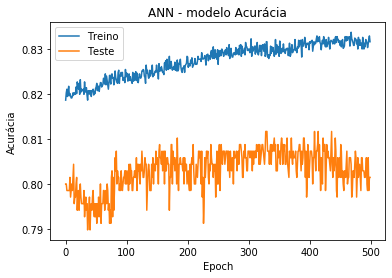

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN - modelo Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

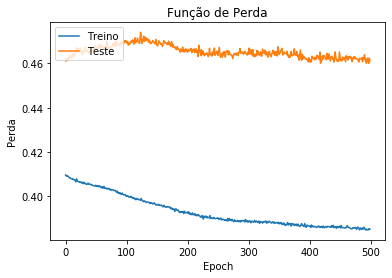

In [25]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Função de Perda') 
plt.ylabel('Perda') 
plt.xlabel('Epoch') 
plt.legend(['Treino', 'Teste'], loc='upper left') 
plt.show()

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
model = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(10,6),random_state=1,max_iter=150)
print(model)
model.fit(X_train,y_train)
pred = model.predict(X_test)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\aferr\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
print ('\n Teste usando MLP')
print ("Erro médio absoluto:", metrics.mean_absolute_error(y_test,pred))
print ("Erro médio quadrático:", metrics.mean_squared_error(y_test,pred))
print ("Erro médio raiz quadrada:", np.sqrt(metrics.mean_squared_error(y_test,pred)))


 Teste usando MLP
Erro médio absoluto: 0.1927007299270073
Erro médio quadrático: 0.1927007299270073
Erro médio raiz quadrada: 0.43897691274941475


In [30]:
confusion_matrix(y_test,pred)

array([[541,  10],
       [122,  12]], dtype=int64)